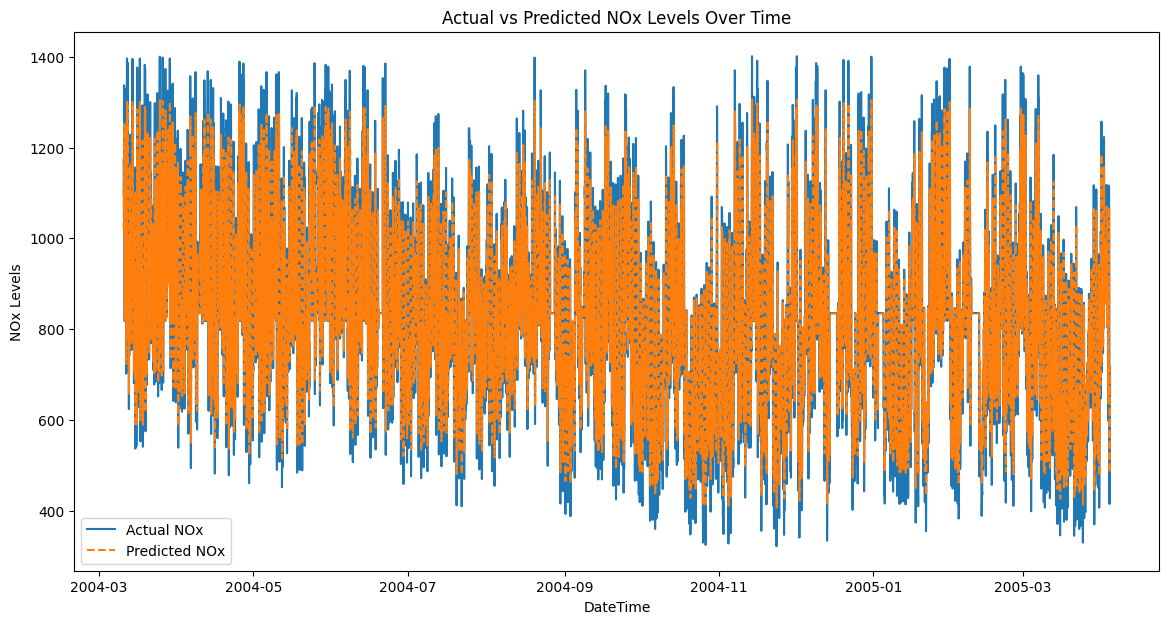

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# Create lagged feature for NOx
data['NOx_lagged'] = data['PT08.S3(NOx)'].shift(1)

# Drop rows with NaN values
data.dropna(inplace=True)

# Define input feature (lagged NOx) and output target (current NOx)
X = data['NOx_lagged'].values.reshape(-1, 1)
y = data['PT08.S3(NOx)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the entire dataset
y_pred = model.predict(X)

# Create a DataFrame for the results
results = pd.DataFrame({
    'DateTime': data.index,
    'Actual_NOx': y,
    'Predicted_NOx': y_pred
})

# Plot the actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(results['DateTime'], results['Actual_NOx'], label='Actual NOx')
plt.plot(results['DateTime'], results['Predicted_NOx'], label='Predicted NOx', linestyle='--')
plt.xlabel('DateTime')
plt.ylabel('NOx Levels')
plt.title('Actual vs Predicted NOx Levels Over Time')
plt.legend()
plt.show()


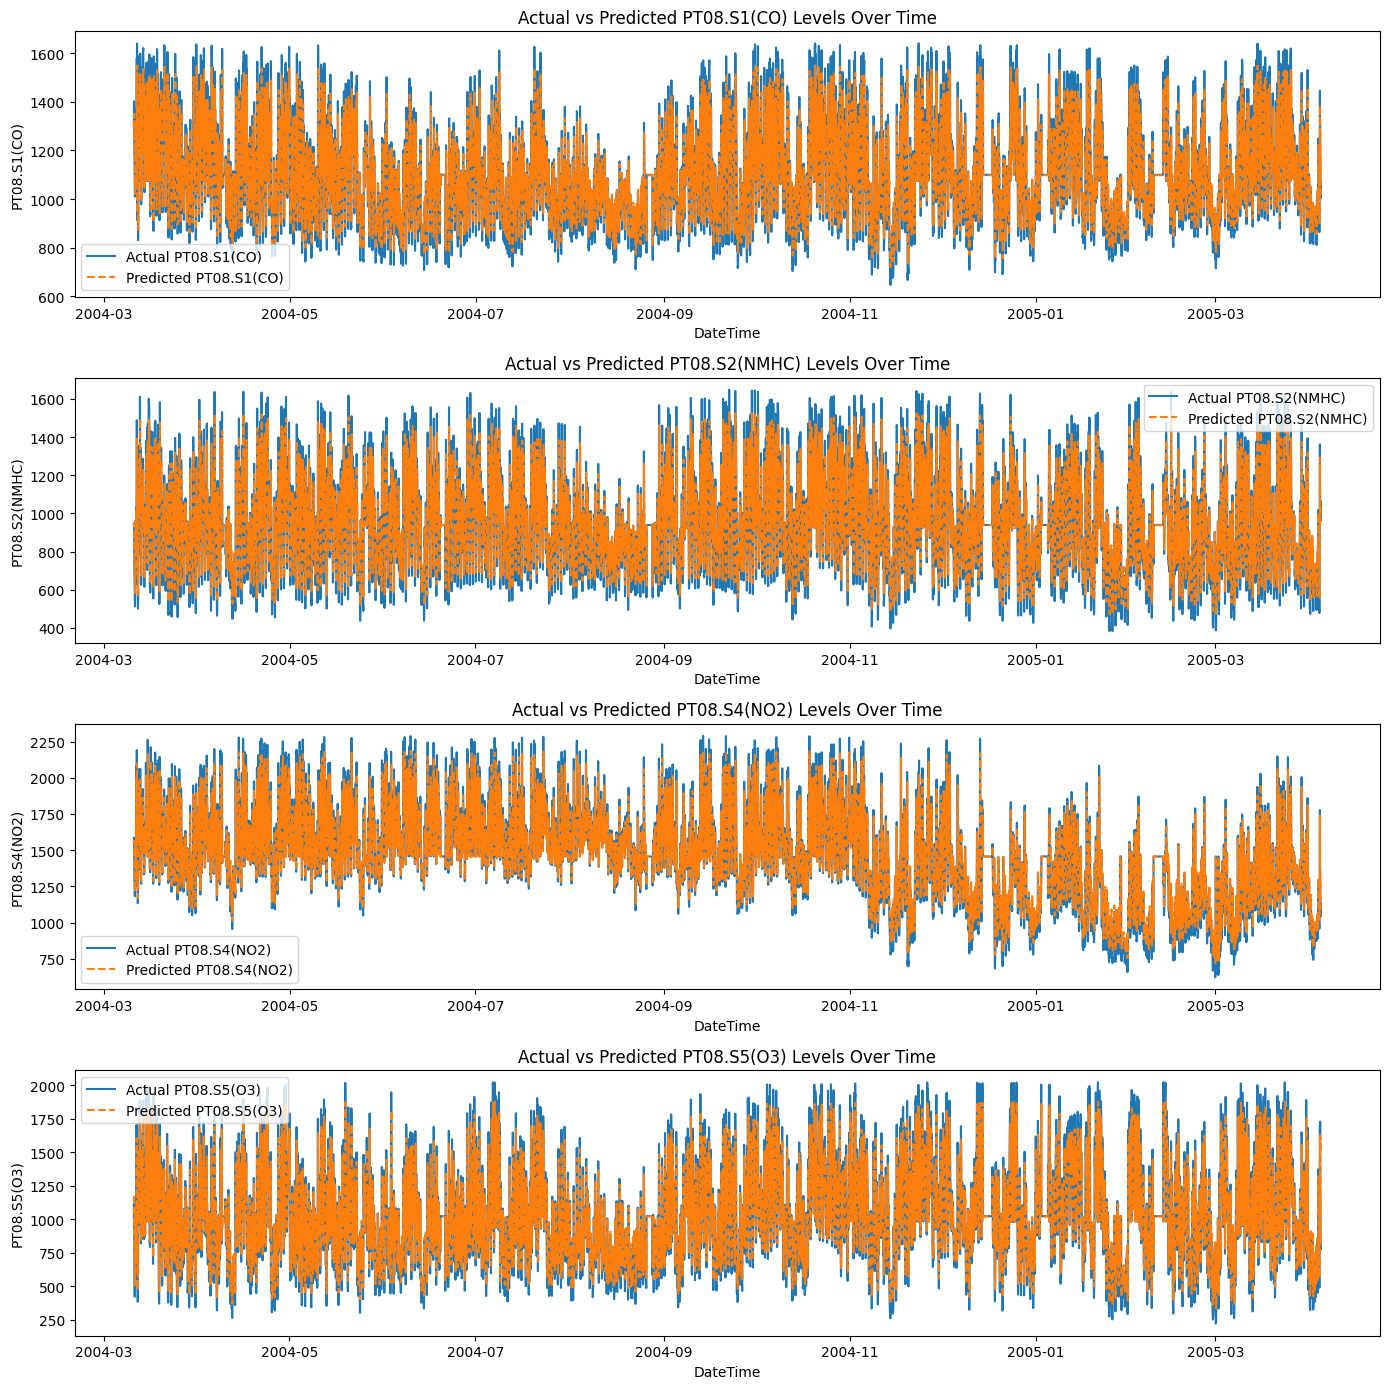

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# List of pollutants to model
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Dictionary to store results
results_dict = {}

# Function to train and predict using linear regression
def train_and_predict(pollutant):
    data[f'{pollutant}_lagged'] = data[pollutant].shift(1)
    data.dropna(inplace=True)
    
    X = data[f'{pollutant}_lagged'].values.reshape(-1, 1)
    y = data[pollutant].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    results = pd.DataFrame({
        'DateTime': data.index,
        f'Actual_{pollutant}': y,
        f'Predicted_{pollutant}': y_pred
    })
    
    return results

# Train and predict for each pollutant
for pollutant in pollutants:
    results_dict[pollutant] = train_and_predict(pollutant)

# Plot the actual data and predictions for each pollutant
plt.figure(figsize=(14, 14))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(len(pollutants), 1, i)
    results = results_dict[pollutant]
    plt.plot(results['DateTime'], results[f'Actual_{pollutant}'], label=f'Actual {pollutant}')
    plt.plot(results['DateTime'], results[f'Predicted_{pollutant}'], label=f'Predicted {pollutant}', linestyle='--')
    plt.xlabel('DateTime')
    plt.ylabel(pollutant)
    plt.title(f'Actual vs Predicted {pollutant} Levels Over Time')
    plt.legend()

plt.tight_layout()
plt.show()


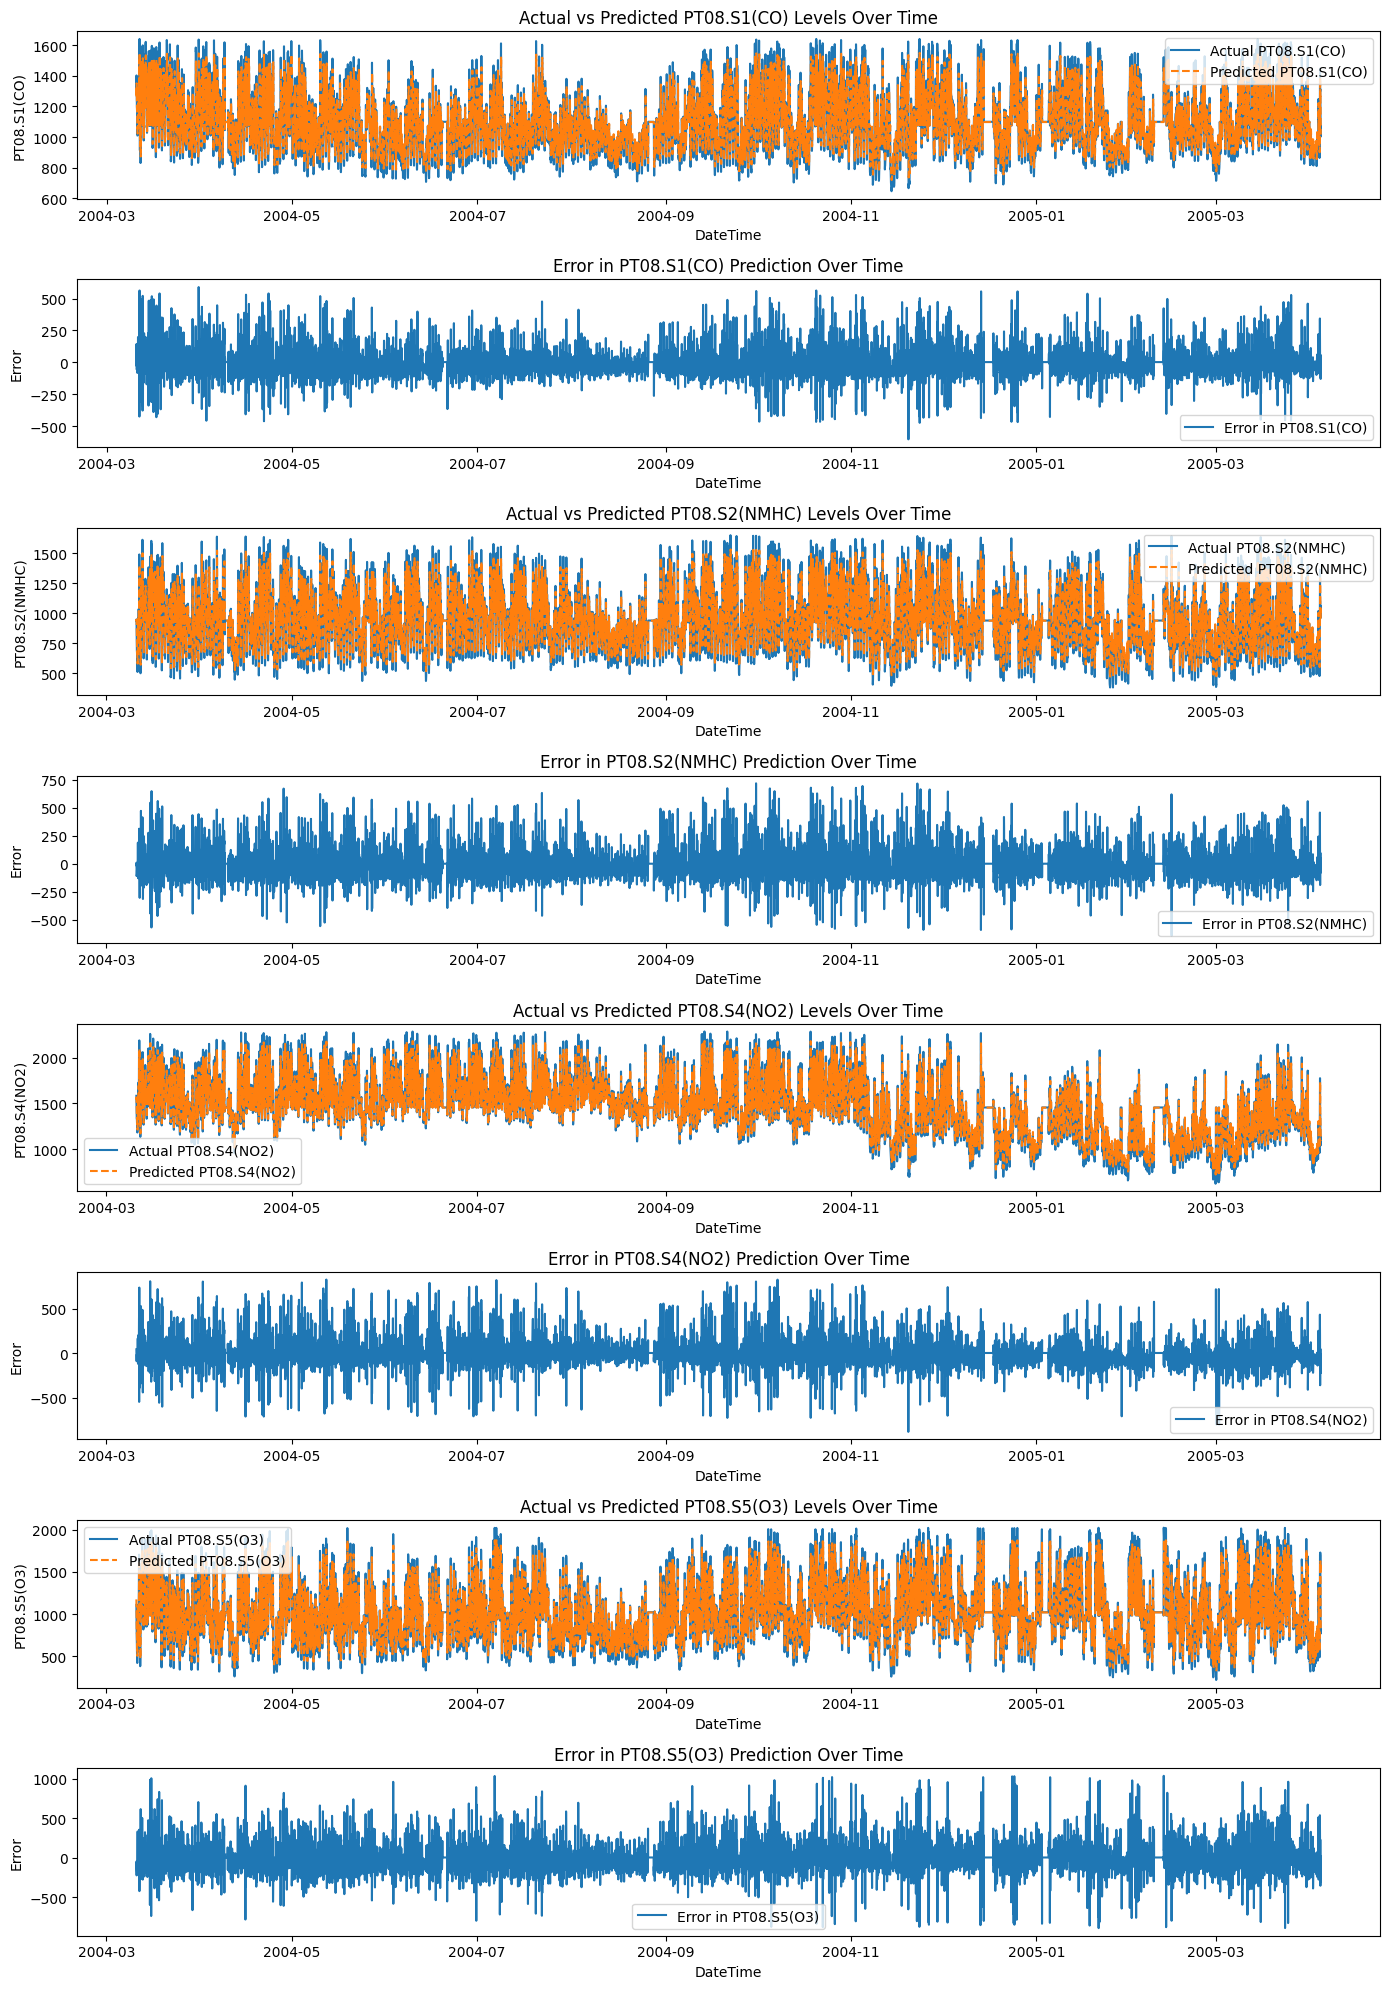

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data
file_path = 'clean.csv'
data = pd.read_csv(file_path)

# Ensure the DateTime column is in datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Sort the data by DateTime
data.sort_values(by='DateTime', inplace=True)

# Set the DateTime column as the index
data.set_index('DateTime', inplace=True)

# List of pollutants to model
pollutants = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

# Dictionary to store results
results_dict = {}

# Function to train and predict using linear regression
def train_and_predict(pollutant):
    data[f'{pollutant}_lagged'] = data[pollutant].shift(1)
    data.dropna(inplace=True)
    
    X = data[f'{pollutant}_lagged'].values.reshape(-1, 1)
    y = data[pollutant].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    results = pd.DataFrame({
        'DateTime': data.index,
        f'Actual_{pollutant}': y,
        f'Predicted_{pollutant}': y_pred
    })
    
    return results

# Train and predict for each pollutant
for pollutant in pollutants:
    results_dict[pollutant] = train_and_predict(pollutant)

# Plot the actual data, predictions, and errors for each pollutant
plt.figure(figsize=(14, 20))
for i, pollutant in enumerate(pollutants, 1):
    results = results_dict[pollutant]
    
    # Plot actual vs predicted
    plt.subplot(len(pollutants) * 2, 1, i * 2 - 1)
    plt.plot(results['DateTime'], results[f'Actual_{pollutant}'], label=f'Actual {pollutant}')
    plt.plot(results['DateTime'], results[f'Predicted_{pollutant}'], label=f'Predicted {pollutant}', linestyle='--')
    plt.xlabel('DateTime')
    plt.ylabel(pollutant)
    plt.title(f'Actual vs Predicted {pollutant} Levels Over Time')
    plt.legend()
    
    # Plot error
    plt.subplot(len(pollutants) * 2, 1, i * 2)
    plt.plot(results['DateTime'], results[f'Actual_{pollutant}'] - results[f'Predicted_{pollutant}'], label=f'Error in {pollutant}')
    plt.xlabel('DateTime')
    plt.ylabel('Error')
    plt.title(f'Error in {pollutant} Prediction Over Time')
    plt.legend()

plt.tight_layout()
plt.show()
